<a href="https://colab.research.google.com/github/TouchSeyha/Machine-Learning-Project/blob/main/Final_Project_ChestX_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project: Chest_Xray**

> Group: 6 Members
- Khieng Knen
- Touch Seyha
- Moeun Sokha
- Ath Sothearith

***- Deadline: 25, June, 2024***


# **Project Models**

## **Step 1: Install Required Libraries & Import Data**
- Data Location: [Chest-Xray Data Link](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data)

1. Import Necessary Libraries
These libraries are essential for data manipulation, visualization, and building machine learning models.

* numpy and pandas: For numerical operations and data manipulation.
* matplotlib and seaborn: For data visualization.
* os: For handling directory paths.
* cv2 (OpenCV): For image processing.
* tensorflow and keras: For building and training neural networks.
* sklearn: For preprocessing and splitting the dataset.

In [ ]:
# Install TensorFlow (only if not already installed)
try:
    import tensorflow as tf
except ImportError:
    !pip install tensorflow

**Explanation**:
- This code tries to import the TensorFlow library, which is essential for building and training deep learning models.
- If TensorFlow is not installed (`ImportError`), it installs TensorFlow using `pip install tensorflow`.

## **Step 2: Import Necessary Libraries**

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from google.colab import drive
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight

**Explanation**:
- Various libraries are imported here:
  - `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn` for data manipulation and visualization.
  - `os` and `cv2` for file operations and image processing.
  - TensorFlow and Keras modules for building and training deep learning models.
  - Scikit-learn modules for data preprocessing and model evaluation.
  - `google.colab` for integrating with Google Drive in a Colab environment.

## **Step 3: Mount Google Drive**

Mounting Google Drive allows access to your dataset stored in Google Drive.

In [ ]:
# Step 2: Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Explanation**:
- This line mounts Google Drive to the Colab environment, enabling access to files stored in Google Drive.

## **Step 4: Load and Preprocess Dataset**

In [ ]:
data_dir = '/content/drive/MyDrive/Colab_Machine_Learning/chest_xray'

# Define function to load and preprocess images
def load_images(data_dir, img_size=(224, 224)):
    data = []
    labels = []
    classes = ['NORMAL', 'PNEUMONIA']

    for category in classes:
        path = os.path.join(data_dir, category)
        class_num = classes.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_resized = cv2.resize(img_array, img_size)
                data.append(img_resized)
                labels.append(category)  # Use class names instead of numbers
            except Exception as e:
                pass

    return np.array(data), np.array(labels)

# Load datasets
train_data, train_labels = load_images(os.path.join(data_dir, 'train'))
val_data, val_labels = load_images(os.path.join(data_dir, 'val'))
test_data, test_labels = load_images(os.path.join(data_dir, 'test'))

**Explanation**:
- `data_dir` specifies the directory where the dataset is stored.
- `load_images` function loads images from the specified directory, resizes them to 224x224 pixels, and stores them along with their labels.
- It handles two classes: 'NORMAL' and 'PNEUMONIA'.
- `cv2.imread` reads the image, `cv2.resize` resizes it, and the images and labels are appended to lists.
- The dataset is divided into three sets: training, validation, and test.
- The `load_images` function is called for each set to load the images and their labels.

## **Step 5: Encode Labels**

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

**Explanation**:
- `LabelEncoder` from Scikit-learn converts categorical labels (i.e., 'NORMAL' and 'PNEUMONIA') into numerical values.
- `fit_transform` is used for training labels, and `transform` is used for validation and test labels.

## **Step 6: Plot Class Distribution in the Training Set**

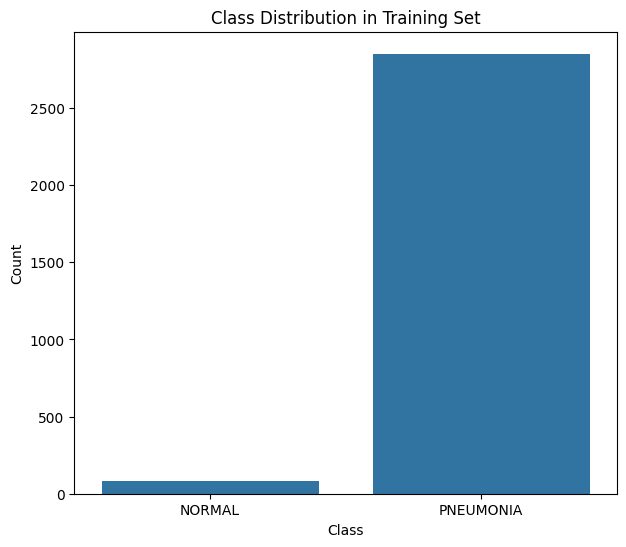

In [ ]:
# Plot class distribution
plt.figure(figsize=(7, 6))
sns.countplot(x=train_labels)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**Explanation**:
- This part visualizes the class distribution in the training set using a bar plot.
- It helps to check if the dataset is balanced or imbalanced.

## **Step 7: Split the Training Data into Training and Validation Sets**

In [ ]:
# Split the training data if additional validation set is needed
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

**Explanation**:

This line of code splits the training data and its corresponding labels into two separate sets: one for training the model and the other for validating its performance.

Here's a breakdown:

- `train_data`: This variable contains the features or input data used to train the machine learning model.
- `train_labels`: This variable contains the corresponding labels or outputs for the training data.

- `val_data`: This variable will hold a portion of the original training data, which will be used for validation during the training process.
- `val_labels`: This variable will contain the corresponding labels for the validation data.

The `train_test_split` function divides the original training data (`train_data` and `train_labels`) into two parts: a training set and a validation set. The size of the validation set is determined by the `test_size` parameter, which is set to 0.2 in this case, meaning 20% of the original training data will be allocated for validation. The `random_state` parameter ensures that the data is split consistently every time the code is run.

So, after executing this line of code, you'll have `train_data` and `train_labels` for training the model, and `val_data` and `val_labels` for evaluating the model's performance during training.

## **Step 8: Normalize the Data**

In [ ]:
# Normalize the data
train_data = train_data / 255.0
val_data = val_data / 255.0
test_data = test_data / 255.0

**Explanation**:
- The pixel values of the images are normalized to the range [0, 1] by dividing by 255.0.
- This is a common preprocessing step for neural networks to help with convergence.

## **Step 9: Display Sample Images**

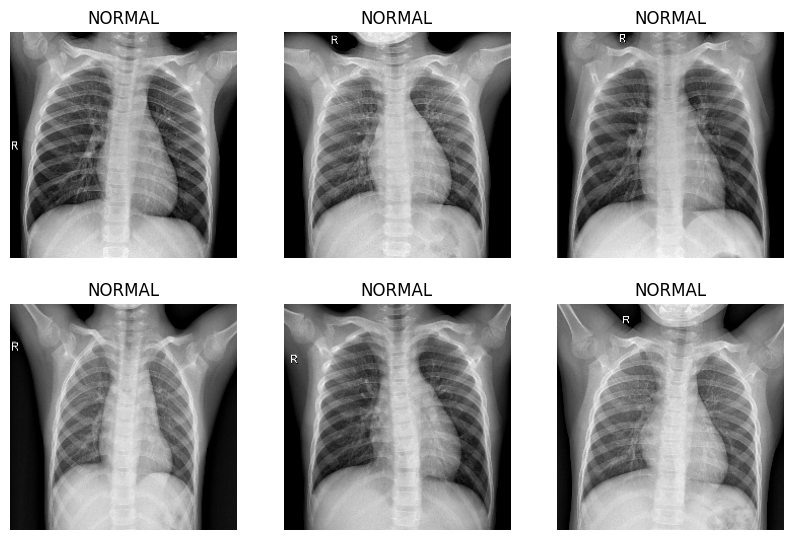

In [ ]:
# Display sample images
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_data[i])
    plt.title('PNEUMONIA' if train_labels[i] == 1 else 'NORMAL')
    plt.axis('off')
plt.show()

## **Step 10: Check for Missing Images**

In [ ]:
# Check for images shapes
print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Step 9: Check for Missing Images Data Cleaning
def check_missing_images(images):
    missing_count = sum([1 for img in images if np.all(img == 0)])
    return missing_count

missing_images_train = check_missing_images(X_train)
missing_images_val = check_missing_images(X_val)
missing_images_test = check_missing_images(X_test)

print("Missing images in training set:", missing_images_train)
print("Missing images in validation set:", missing_images_val)
print("Missing images in test set:", missing_images_test)

Training data shape: (2348, 224, 224, 3)
Validation data shape: (587, 224, 224, 3)
Test data shape: (374, 224, 224, 3)


## **Step 11: Data Augmentation**

In [ ]:
# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Training data generator
train_generator = train_datagen.flow(
    train_data,
    train_labels_encoded,
    batch_size=32
)

# Validation data generator
val_generator = test_val_datagen.flow(
    val_data,
    val_labels_encoded,
    batch_size=32
)

# Test data generator
test_generator = test_val_datagen.flow(
    test_data,
    test_labels_encoded,
    batch_size=32,
    shuffle=False
)

**Explanation**:
- `ImageDataGenerator` is used for data augmentation, which helps improve the generalization of the model.
- For training data, various augmentations like shear, zoom, and horizontal flip are applied.
- For validation and test data, only rescaling is applied.
- These generators create batches of images and labels for training, validation, and testing.
- `flow` method creates an iterator that yields batches of data.

## **Step 12: Build the CNN Model & Load Pre-trained ResNet50 Model + Higer Level Layers**

In [ ]:
# Load pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of ResNet50
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 0s 0us/step


**Explanation**:
- `ResNet50` is a pre-trained model from the ImageNet dataset.
- `include_top=False` excludes the fully connected layers at the top, allowing custom layers to be added.
- `input_shape` specifies the input image dimensions.

**Explanation**:
- Custom layers are added on top of the ResNet50 base model:
  - `Flatten` layer flattens the output of the base model.
  - `Dense` layer with 1024 neurons and ReLU activation is added.
  - `Dropout` layer with a rate of 0.5 to prevent overfitting.
  - `Dense` layer with 1 neuron and sigmoid activation for binary classification.

**Explanation**:
- The final model is created using the `Model` class from Keras, with the base model's input and the custom layers' output.

**Explanation**:
- Freezing the layers of the base model means their weights will not be updated during training.
- This is done to leverage the pre-trained weights and only train the custom layers.

**Explanation**:
- The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy metric.
- Binary cross-entropy is used for binary classification tasks.


## **Step 13: Callbacks for Training**

In [ ]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath='/content/drive/MyDrive/Colab_Machine_Learning/best_model.h5', monitor='val_loss', save_best_only=True)
]

**Explanation**:
- Callbacks are used to monitor training and save the model.
- `EarlyStopping` stops training if the validation loss does not improve for 3 epochs and restores the best weights.
- `ModelCheckpoint` saves the model with the lowest validation loss.


## **Step 14: Calculate class weight**

In [ ]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels_encoded),
    y=train_labels_encoded
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

Class Weights: {0: 17.470238095238095, 1: 0.5147316730971588}


**Explanation**:
- Class weights are computed to handle class imbalance in the training data.
- `compute_class_weight` from Scikit-learn calculates weights inversely proportional to class frequencies.
- These weights are used during model training.

## **Step 15: Train the Model**

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weights
)

Exception ignored in: <function _xla_gc_callback at 0x7e77beea7250>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Epoch 1/20
92/92 [==============================] - 69s 756ms/step - loss: 0.7005 - accuracy: 0.0348 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
92/92 [==============================] - 42s 454ms/step - loss: 0.9205 - accuracy: 0.0862 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
92/92 [==============================] - 39s 421ms/step - loss: 0.6932 - accuracy: 0.0286 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
92/92 [==============================] - 40s 429ms/step - loss: 0.6933 - accuracy: 0.0286 - val_loss: 0.6932 - val_accuracy: 0.5000


**Explanation**:
- The model is trained for 20 epochs using the training and validation data generators.
- Callbacks and class weights are passed to handle early stopping, model checkpointing, and class imbalance.

## **Step 16: Evaluate the Model**

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Additional metrics
y_true = test_labels_encoded
y_pred = model.predict(test_generator)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
print(confusion_matrix(y_true, y_pred))

12/12 [==============================] - 3s 276ms/step - loss: 0.6955 - accuracy: 0.3529
Test Loss: 0.6955168843269348
Test Accuracy: 0.3529411852359772
12/12 [==============================] - 3s 108ms/step
              precision    recall  f1-score   support

      NORMAL       0.35      1.00      0.52       132
   PNEUMONIA       0.00      0.00      0.00       242

    accuracy                           0.35       374
   macro avg       0.18      0.50      0.26       374
weighted avg       0.12      0.35      0.18       374

[[132   0]
 [242   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Explanation**:
- The model is evaluated on the test set.
- `evaluate` method returns the test loss and accuracy.
- Predictions are made on the test set, and a classification report and confusion matrix are printed to evaluate the performance further.


## **Step 17: Save the Model**

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Colab_Machine_Learning/chest_xray_final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Explanation**:
- **Purpose**: This line of code saves the trained model to a file, allowing you to load and use the model later without needing to retrain it.
- **Method**: `model.save()` is a method in Keras that saves the entire architecture, weights, and training configuration (including the optimizer and loss functions) to a single HDF5 file.
- **File Path**: The file is saved to the specified path (`'/content/drive/MyDrive/Colab_Machine_Learning/chest_xray_final_model.h5'`). This path should point to a location in your Google Drive (if using Google Colab) so that the saved model is stored persistently.
- **Usage**: After saving, you can load the model using `tf.keras.models.load_model('/content/drive/MyDrive/Colab_Machine_Learning/chest_xray_final_model.h5')` in a new session to make predictions or continue training.

# **Step 18: Make Predictions on New Data**

1/1 [==============================] - 2s 2s/step
Prediction for the new image: NORMAL


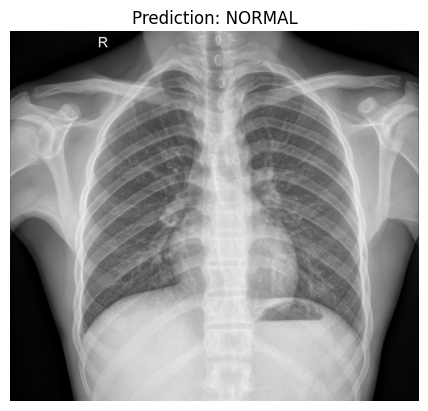

In [ ]:
# Load the Saved Model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Machine_Learning/chest_xray_final_model.h5')

def preprocess_and_predict(img_path, model, img_size=(224, 224)):
    img = cv2.imread(img_path)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    return 'PNEUMONIA' if prediction[0] > 0.5 else 'NORMAL'

# Example usage
new_image_path = '/content/drive/MyDrive/Colab_Machine_Learning/chest_xray/test/NORMAL/IM-0025-0001.jpeg'
prediction = preprocess_and_predict(new_image_path, model)
print("Prediction for the new image:", prediction)

# Visualize Predictions
def display_prediction(img_path, prediction):
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {prediction}")
    plt.axis('off')
    plt.show()

# Example usage
display_prediction(new_image_path, prediction)

**Explanation**:
- **Purpose**: This line of code loads a previously saved model from a file, allowing you to use the model without needing to retrain it.
- **Method**: `tf.keras.models.load_model()` is a method in Keras that loads the entire architecture, weights, and training configuration from a saved HDF5 file.
- **File Path**: The path to the saved model file is specified (`'/content/drive/MyDrive/Colab_Machine_Learning/chest_xray_final_model.h5'`).

**Explanation**:
- **Function**: `preprocess_and_predict` is a function that preprocesses an image and uses the loaded model to make a prediction.
- **Image Loading**: The image is loaded using `cv2.imread()`.
- **Resizing**: The image is resized to the specified size (224x224) using `cv2.resize()`.
- **Normalization**: The pixel values of the image are normalized to the range [0, 1] by dividing by 255.0.
- **Batch Dimension**: The image is expanded to include a batch dimension using `np.expand_dims()`.
- **Prediction**: The model makes a prediction using `model.predict()`, and the result is interpreted as 'PNEUMONIA' if the prediction is greater than 0.5, otherwise 'NORMAL'.

**Explanation**:
- **Example**: This example uses the `preprocess_and_predict` function to make a prediction on a new image.
- **Image Path**: The path to the new image is specified.
- **Prediction**: The prediction result is printed.

**Explanation**:
- **Function**: `display_prediction` is a function that displays the image along with the prediction result.
- **Image Loading**: The image is loaded using `cv2.imread()`.
- **Color Conversion**: The image color is converted from BGR to RGB using `cv2.cvtColor()` for proper display with `matplotlib`.
- **Display**: The image is displayed with `plt.imshow()`, and the prediction is shown as the title using `plt.title()`.

**Explanation**:
- **Example**: This example uses the `display_prediction` function to display the image along with the prediction result.
- **Image Path**: The path to the new image is specified.
- **Prediction**: The prediction result is displayed as the title of the image.


# **Step 19: Visualize Training History**

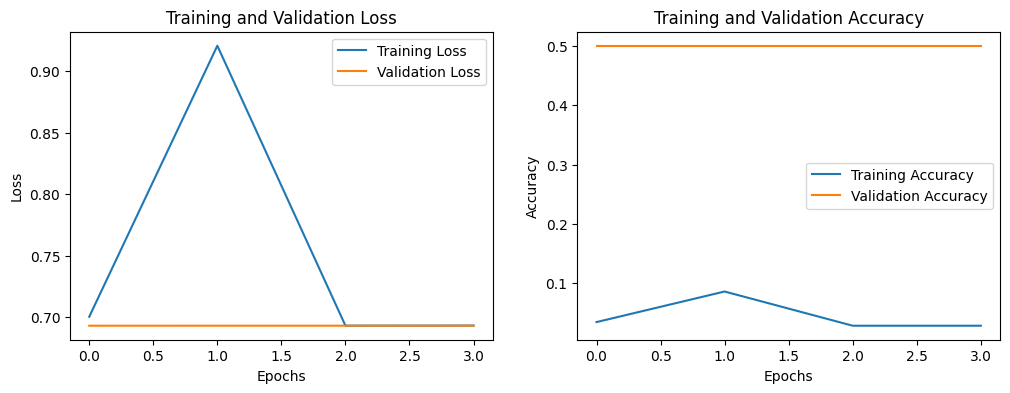

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

**Explanation**:

- **Prepare Canvas**:
  - `plt.figure(figsize=(12, 4))`: Create a blank canvas for plotting with a size of 12 units wide and 4 units tall.

- **Divide Canvas**:
  - `plt.subplot(1, 2, 1)`: Divide the canvas into 1 row and 2 columns, focusing on the first section.

- **Plot Loss**:
  - `plt.plot(history.history['loss'], label='Training Loss')`: Plot the training loss over epochs.
  - `plt.plot(history.history['val_loss'], label='Validation Loss')`: Plot the validation loss over epochs.

- **Add Labels and Title for Loss Plot**:
  - `plt.xlabel('Epochs')`: Label the x-axis as "Epochs".
  - `plt.ylabel('Loss')`: Label the y-axis as "Loss".
  - `plt.legend()`: Add a legend to differentiate between training and validation loss.
  - `plt.title('Training and Validation Loss')`: Set a title for the plot.

- **Move to Next Section of Canvas**:
  - `plt.subplot(1, 2, 2)`: Move to the second section of the canvas.

- **Plot Accuracy**:
  - `plt.plot(history.history['accuracy'], label='Training Accuracy')`: Plot the training accuracy over epochs.
  - `plt.plot(history.history['val_accuracy'], label='Validation Accuracy')`: Plot the validation accuracy over epochs.

- **Add Labels and Title for Accuracy Plot**:
  - `plt.xlabel('Epochs')`: Label the x-axis as "Epochs".
  - `plt.ylabel('Accuracy')`: Label the y-axis as "Accuracy".
  - `plt.legend()`: Add a legend to differentiate between training and validation accuracy.
  - `plt.title('Training and Validation Accuracy')`: Set a title for the plot.

- **Display the Plots**:
  - `plt.show()`: Show the completed plots on the canvas.